In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import matplotlib as mpl
import scipy.stats
from matplotlib import rc
%matplotlib inline
from IPython.display import Image

In [2]:
ver_04 = pd.read_csv("final_df_04.csv", encoding='utf-8')

ver_04.tail(3)

,Unnamed: 0,id,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,...,등급,영화구분,expert_rating,starring_actors,running_times,audience_rating,rating_audiences,개봉일_int,director_power,director_movie_num
925,925,925,빅 위시,카를로스 구티에레스 메드라노,NaN,(주)박수엔터테인먼트,(주)박수엔터테인먼트,2019-10-30,개봉영화,장편,...,전체관람가,일반영화,6.0,[국내] 전체 관람가,79,6.500000,4,2019,0.0,1 [1]
926,926,926,너를 만난 여름,장적사,NaN,오드,"오드,(주)홈초이스",2019-10-16,개봉영화,장편,...,12세이상관람가,독립/예술영화,5.5,"진비우(위화이), 하람두(겅겅)",109,8.428571,63,2019,31888.0,1 [1]
927,927,927,100일 동안 100가지로 100퍼센트 행복찾기,플로리안 데이비드 핏츠,NaN,(주)영화사 진진,(주)영화사 진진,2019-09-12,개봉영화,장편,...,15세이상관람가,독립/예술영화,5.5,"플로리안 데이비드 핏츠(폴), 마치아스 슈와바이어퍼(토니)",111,8.962963,27,2019,31866.0,1 [1]


In [3]:
# 기존 장르 수: 19개

len(ver_04['장르'].unique())

19

In [4]:
# 기존 국적 수: 24개

len(ver_04['국적'].unique())

24

In [5]:
ver_05 = pd.read_csv("final_df_05.csv", encoding='utf-8')

ver_05.tail(3)

,title,director,producer,importer,distributor,distributor_group,release_date,release_season,release,form,...,expert_rating,starring_actors,running_times,audience_rating,rating_audiences,realease_year,director_power,director_movie_num,sequel,original
925,빅 위시,카를로스 구티에레스 메드라노,NaN,(주)박수엔터테인먼트,(주)박수엔터테인먼트,D,10/30/2019,autumn,개봉영화,장편,...,6.0,[국내] 전체 관람가,79,6.500000,4,2019,0.0,1 [1],0,0
926,너를 만난 여름,장적사,NaN,오드,"오드,(주)홈초이스",D,10/16/2019,autumn,개봉영화,장편,...,5.5,"진비우(위화이), 하람두(겅겅)",109,8.428571,63,2019,31888.0,1 [1],0,0
927,100일 동안 100가지로 100퍼센트 행복찾기,플로리안 데이비드 핏츠,NaN,(주)영화사 진진,(주)영화사 진진,D,9/12/2019,autumn,개봉영화,장편,...,5.5,"플로리안 데이비드 핏츠(폴), 마치아스 슈와바이어퍼(토니)",111,8.962963,27,2019,31866.0,1 [1],0,0


In [6]:
# 변경사항 1. 기존 칼럼명 영어로 통일
# 변경사항 2. 장르: 10개 미만 소수 장르를 통합. 총 5개 감소

len(ver_05['genre'].unique())

14

In [7]:
# 변경사항 3. 국적: 10개 이하 국가를 '기타'로 통합. 총 18개 감소

len(ver_05['nation'].unique())

6

In [8]:
# 변경사항 4. 계절: 개봉일 기준의 계절 카테고리 변수 추가

ver_05['release_season'].unique()

array(['spring', 'winter', 'summer', 'autumn'], dtype=object)

In [9]:
# 변경사항 5. 배급사 그룹: 배급사 외형요소를 기준으로 그룹화

ver_05['distributor_group'].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

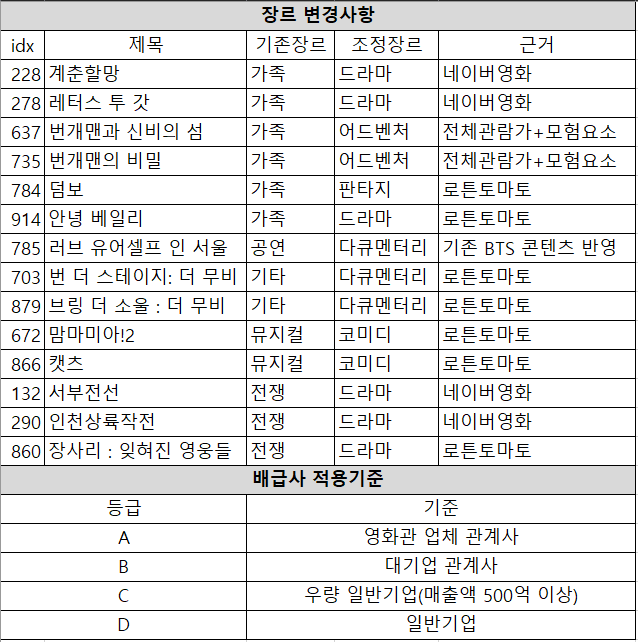

In [10]:
# 변경사항 적용 근거 및 기준

Image("distributor_criteria.png")

In [11]:
# 모델 선택 기준

# 독립 변수: 총 13개
# [배급사 그룹, 개봉 시 계절, 국적, 스크린 수, 장르, 관람 등급, 전문가 평점, 관객 평점, 평점 댓글 수, 러닝타임, 감독 지수, 속편 여부, 원작 여부]

# 종속 변수: 전국 매출액

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = ver_05[['distributor_group', 'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating', 'running_times', \
           'audience_rating', 'rating_audiences', 'director_power', 'sequel', 'original']]
y = ver_05['rev_nationwide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
X_test.to_csv("initial_test_X.csv", encoding='utf-8')
y_test.to_csv("initial_test_y.csv", encoding='utf-8')